### **<h1>Data EXPOST</h1>**

In [22]:
# Imports
import pandas as pd
import plotly.graph_objects as go

# Permission to access my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FILE_PATH = "/content/drive/MyDrive/Doral_Energy/data/raw_data/expost.xlsx"

  

Mounted at /content/drive


# Load the data

In [23]:
df = pd.read_excel(FILE_PATH)
df

,תאריך,שעה,עלו(₪/MWh),ייצור אנרגיהמתחדש (MW),ייצור קונבנציונלי(MW),ביקוש משקי(MW)
0,2021/01/01,00:00:00,157.05,4.0,7002.0,7006.0
1,2021/01/01,00:30:00,157.13,5.0,6682.0,6687.0
2,2021/01/01,01:00:00,157.13,4.0,6395.0,6399.0
3,2021/01/01,01:30:00,157.35,4.0,6147.0,6151.0
4,2021/01/01,02:00:00,157.24,3.0,5931.0,5934.0
...,...,...,...,...,...,...
33545,2022/11/30,21:30:00,535.09,153.0,8726.0,8879.0
33546,2022/11/30,22:00:00,535.56,150.0,8462.0,8612.0
33547,2022/11/30,22:30:00,535.09,11.0,8248.0,8259.0
33548,2022/11/30,23:00:00,535.09,7.0,7887.0,7894.0


# Change column names from Hebrew to English 


In [24]:
df.rename(columns={'תאריך': 'date', 'שעה': 'hour', 'עלו(₪/MWh)': 'cost(₪/MWh)', 'ייצור אנרגיהמתחדש (MW)': 'renew_eng_prod(MW)', 'ייצור קונבנציונלי(MW)': 'conven_prod(MW)', 'ביקוש משקי(MW)': 'eco_demand(MW)'}, inplace=True)
df.head()

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
0,2021/01/01,00:00:00,157.05,4.0,7002.0,7006.0
1,2021/01/01,00:30:00,157.13,5.0,6682.0,6687.0
2,2021/01/01,01:00:00,157.13,4.0,6395.0,6399.0
3,2021/01/01,01:30:00,157.35,4.0,6147.0,6151.0
4,2021/01/01,02:00:00,157.24,3.0,5931.0,5934.0


# Check the types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                33550 non-null  object 
 1   hour                33550 non-null  object 
 2   cost(₪/MWh)         33550 non-null  float64
 3   renew_eng_prod(MW)  33550 non-null  float64
 4   conven_prod(MW)     33550 non-null  float64
 5   eco_demand(MW)      33550 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [26]:
# Change hour and date types 
df['date'] = df['date'].astype('datetime64[ns]')
df['hour'] = df['hour'].astype('datetime64[ns]').dt.strftime('%H:%M')

#Get some understanding about the range of expost


In [27]:
df.describe()

,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
count,33550.000000,33550.000000,33550.000000,33550.000000
mean,390.970712,680.129955,7976.029568,8656.159851
std,312.397873,831.293983,1732.418545,1852.158545
min,140.520000,0.000000,3536.000000,5052.000000
25%,239.115000,18.000000,6609.000000,7303.000000
50%,336.240000,152.000000,7766.000000,8386.000000
75%,495.870000,1373.000000,9049.750000,9821.000000
max,4200.070000,2833.000000,14689.000000,14786.000000


# Check if there are missing values


In [28]:
df.isna().any(axis=1).sum()

0

# Are there any duplicates?

In [29]:
df.duplicated().sum()

47

In [30]:
df[df.duplicated()]

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
17087,2021-12-23,00:30,262.43,1.0,8010.0,8011.0
17088,2021-12-23,01:00,262.25,2.0,7711.0,7713.0
17089,2021-12-23,01:30,262.06,2.0,7370.0,7372.0
17090,2021-12-23,02:00,264.93,2.0,7147.0,7149.0
17091,2021-12-23,02:30,264.68,2.0,7026.0,7028.0
17092,2021-12-23,03:00,265.01,2.0,6919.0,6921.0
17093,2021-12-23,03:30,264.76,2.0,6898.0,6900.0
17094,2021-12-23,04:00,264.93,1.0,6914.0,6915.0
17095,2021-12-23,04:30,264.89,1.0,7069.0,7070.0
17096,2021-12-23,05:00,265.27,1.0,7320.0,7321.0


In [31]:
# Drop the rows
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [32]:
# Get the names of the columns from index 2
column_names = list(df.columns.values[2:])

# Group the data by date and hour
grouped_df = df.groupby(['date', 'hour'])

mask = grouped_df[column_names].transform('nunique') > 1
filtered_df = df.loc[mask.any(axis=1)]

filtered_df 

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
17038,2021-12-23,00:00,376.30,1.0,8397.0,8398.0
17086,2021-12-23,00:00,263.57,1.0,8397.0,8398.0
31967,2022-10-30,01:00,604.44,85.0,6503.0,6588.0
31968,2022-10-30,01:00,604.44,89.0,6156.0,6245.0
31969,2022-10-30,01:30,602.54,94.0,6327.0,6421.0
31970,2022-10-30,01:30,602.54,78.0,6129.0,6207.0


It seems that there was a mistake in the data collection process and 2 different values (cost(₪/MWh), for renew_eng_prod, conven_prod, eco_demeand) had been written for the exact date and same hour

In [33]:
# drop the rows from the full data frame that match the filtered data frame
df.drop(filtered_df.index, inplace=True)
df

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
0,2021-01-01,00:00,157.05,4.0,7002.0,7006.0
1,2021-01-01,00:30,157.13,5.0,6682.0,6687.0
2,2021-01-01,01:00,157.13,4.0,6395.0,6399.0
3,2021-01-01,01:30,157.35,4.0,6147.0,6151.0
4,2021-01-01,02:00,157.24,3.0,5931.0,5934.0
...,...,...,...,...,...,...
33498,2022-11-30,21:30,535.09,153.0,8726.0,8879.0
33499,2022-11-30,22:00,535.56,150.0,8462.0,8612.0
33500,2022-11-30,22:30,535.09,11.0,8248.0,8259.0
33501,2022-11-30,23:00,535.09,7.0,7887.0,7894.0


In [34]:
# Make the rows with same date and hour to become one row with mean values
filtered_df = filtered_df.groupby(['date', 'hour']).mean().reset_index()
filtered_df

# Concatenate the filtered dataframe to the original dataframe
df = pd.concat([df, filtered_df], ignore_index=True)
df

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
0,2021-01-01,00:00,157.050,4.0,7002.0,7006.0
1,2021-01-01,00:30,157.130,5.0,6682.0,6687.0
2,2021-01-01,01:00,157.130,4.0,6395.0,6399.0
3,2021-01-01,01:30,157.350,4.0,6147.0,6151.0
4,2021-01-01,02:00,157.240,3.0,5931.0,5934.0
...,...,...,...,...,...,...
33495,2022-11-30,23:00,535.090,7.0,7887.0,7894.0
33496,2022-11-30,23:30,534.620,5.0,7476.0,7481.0
33497,2021-12-23,00:00,319.935,1.0,8397.0,8398.0
33498,2022-10-30,01:00,604.440,87.0,6329.5,6416.5


In [35]:
# Sort the dataframe by date and hour
df.sort_values(by=['date', 'hour'], inplace = True)
df

,date,hour,cost(₪/MWh),renew_eng_prod(MW),conven_prod(MW),eco_demand(MW)
0,2021-01-01,00:00,157.05,4.0,7002.0,7006.0
1,2021-01-01,00:30,157.13,5.0,6682.0,6687.0
2,2021-01-01,01:00,157.13,4.0,6395.0,6399.0
3,2021-01-01,01:30,157.35,4.0,6147.0,6151.0
4,2021-01-01,02:00,157.24,3.0,5931.0,5934.0
...,...,...,...,...,...,...
33492,2022-11-30,21:30,535.09,153.0,8726.0,8879.0
33493,2022-11-30,22:00,535.56,150.0,8462.0,8612.0
33494,2022-11-30,22:30,535.09,11.0,8248.0,8259.0
33495,2022-11-30,23:00,535.09,7.0,7887.0,7894.0


# Outliers Detection

In [36]:
fig = go.Figure()
fig.add_trace(go.Box(name='Cost', y=df['cost(₪/MWh)'], boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [37]:
fig = go.Figure()
fig.add_trace(go.Box(name='Renewable Energy production(MW)', y=df['renew_eng_prod(MW)'], boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [38]:
fig = go.Figure()
fig.add_trace(go.Box(name='Conventional Production(MW)', y=df['conven_prod(MW)'], boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [39]:
fig = go.Figure()
fig.add_trace(go.Box(name='Economy Demand(MW)', y=df['eco_demand(MW)'], boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

# Data Frame Correlation

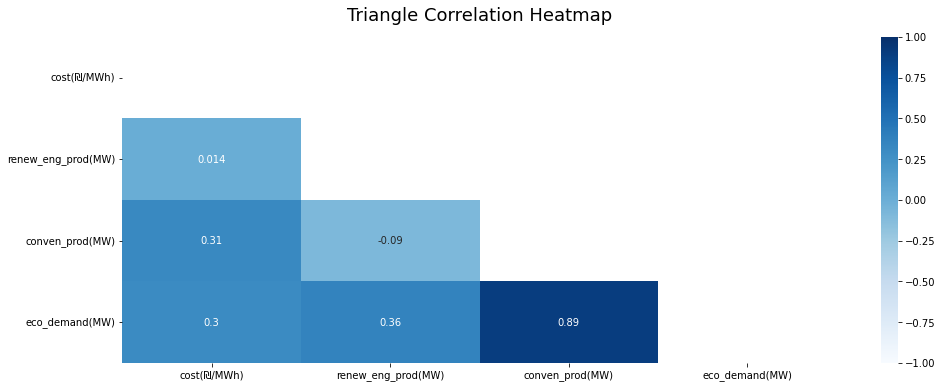

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Increase the size of the heatmap
plt.figure(figsize=(16, 6))

# Define the mask to set the values in the upper triangle to True so that each 
# correlation will appear one time
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**<h4>Notice that there is high correlation between conventional production and the economy demand. </h4>**

# Change date format

In [41]:
df['date'] = df['date'].astype('datetime64[ns]').dt.strftime('%d/%m/%Y')
df['date']

0        01/01/2021
1        01/01/2021
2        01/01/2021
3        01/01/2021
4        01/01/2021
            ...    
33492    30/11/2022
33493    30/11/2022
33494    30/11/2022
33495    30/11/2022
33496    30/11/2022
Name: date, Length: 33500, dtype: object

# Save the changes to excel file


In [42]:
df.to_csv('data_expost.csv', index=False)